In [0]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
print(tf.__version__)





2.2.0-rc3


In [0]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-03 12:21:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.76MB/s    in 68s     

2020-05-03 12:23:03 (4.51 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [0]:

base_dir = '/tmp/rockpaperscissors/rps-cv-images'


train_paper_dir = os.path.join(base_dir + 'paper')
train_rock_dir = os.path.join(base_dir + 'rock')
train_scissors_dir = os.path.join(base_dir + 'scissors')

In [0]:
'''
Augmentasi gambar.
Menggunakan image data generator.
'''
datagen = ImageDataGenerator(
            rotation_range=45,
            horizontal_flip=True,
            vertical_flip=True,
            rescale=1/255, 
            zoom_range=0.2,
            validation_split=0.25) #Dataset dibagi menjadi 75% train set dan 25% validation set.

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(200, 300),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1642 images belonging to 3 classes.
Found 546 images belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


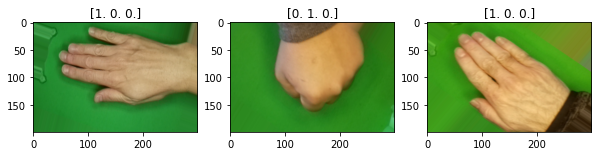

In [0]:
#Menampilkan Gambar hasil proses augmentasi beserta label yang telah diubah menjadi one hot encoding
image, label = train_generator.next()
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.imshow(image[0])
plt.title(label[0])

plt.subplot(1, 3, 2)
plt.imshow(image[1])
plt.title(label[1])

plt.subplot(1, 3, 3)
plt.imshow(image[2])
plt.title(label[2])

plt.show()

In [0]:
# model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='Nadam', #nesterov adam
              metrics=['accuracy']
              )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 35, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 33, 128)      

In [0]:
# model training
cnn = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples / validation_generator.batch_size - 1,
      verbose=1,
)


Epoch 1/15
12/11 [==============================] - 30s 3s/step - loss: 1.1207 - accuracy: 0.4069 - val_loss: 1.0703 - val_accuracy: 0.4047
Epoch 2/15
12/11 [==============================] - 30s 2s/step - loss: 1.0505 - accuracy: 0.5350 - val_loss: 3.4379 - val_accuracy: 0.3307
Epoch 3/15
12/11 [==============================] - 30s 2s/step - loss: 1.0925 - accuracy: 0.6275 - val_loss: 0.9706 - val_accuracy: 0.7412
Epoch 4/15
12/11 [==============================] - 30s 2s/step - loss: 0.8009 - accuracy: 0.6992 - val_loss: 0.5312 - val_accuracy: 0.8113
Epoch 5/15
12/11 [==============================] - 30s 2s/step - loss: 0.4847 - accuracy: 0.8170 - val_loss: 0.4423 - val_accuracy: 0.8346
Epoch 6/15
12/11 [==============================] - 30s 2s/step - loss: 0.3836 - accuracy: 0.8507 - val_loss: 0.5042 - val_accuracy: 0.8152
Epoch 7/15
12/11 [==============================] - 30s 2s/step - loss: 0.3923 - accuracy: 0.8494 - val_loss: 0.3581 - val_accuracy: 0.8482
Epoch 8/15
12/11 [==

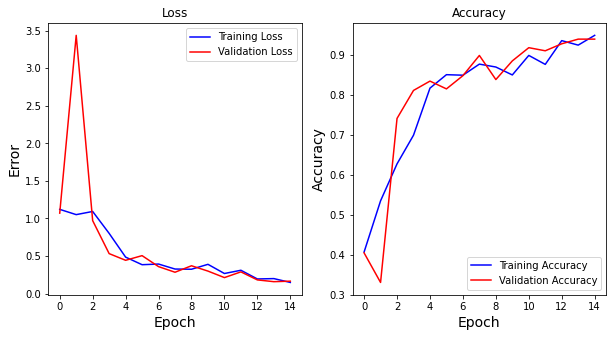

In [0]:
#hasil training
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.ylabel('Error', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.title('Loss')
plt.plot(cnn.history['loss'], label='Training Loss',color='blue')
plt.plot(cnn.history['val_loss'], label='Validation Loss',color='red')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.title('Accuracy')
plt.plot(cnn.history['accuracy'], label='Training Accuracy',color='blue')
plt.plot(cnn.history['val_accuracy'], label='Validation Accuracy',color='red')
plt.legend(loc='best')
plt.show()

Saving 3sQLj3fYBZhheJ7K.png to 3sQLj3fYBZhheJ7K.png
Rock


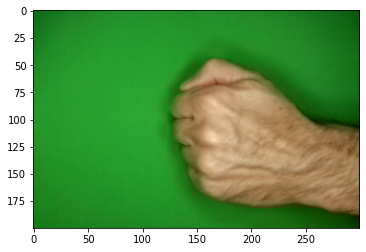

In [0]:

from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path,target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

if classes[0][0]==1.0:
    print('Paper')
elif classes[0][1]==1.0:
    print('Rock')
elif classes[0][2]==1.0:
    print('Scissor')